# Outline of Notebook


**I. Load Data Set**

**II. Data Cleansing**

1. Explore Potential Variables

2. Remain Listings after 2018

  1) Approach 1: Use last_review

  2) Approach 1: Use calendar_updated 

3. Address Missing Values

  1) Examine Missing Values
  
  2) Address Missing Values

4. Clear Messy Characters in Values

5. Create Response Variable 

6. Address Outliers 

  1) Classify Numerical Variables and Categorical Variables
  
  2) Descriptive Statistics of Numerical Variables
  
  3) Distribution of Numerical Variables
  
  4) Address Outliers
  
      a) Approach 1: Remove values above upper limits in boxplots
    
      b) Approach 2: Remove obvious extreme values
    
**III. Sub-Task 1: Summary Statistics** 

1. Descriptive Statistics of Numerical Variables 

2. Popular Characteristics of Prosperities

  1) Amenities Types and Distribution across Prosperities
  
  2) Neighborhood Groups and Listing Distribution 
  
  3) Statistics of Property Type
  
  4) Statistics of Room Type
  
  5) Statistics of Bed Type
  
  6) Statistics of Instant-bookable Listings
  
3. Popular Characteristics of Hosts 

  1) Most Powerful Host
  
  2) Most Popular Host
  
  3) Statistics of Hosts with Profile Photo, with Verified Identity, Super Hosts, Requiring Guests’ Verification and with Requiring Guests’ Profile Photo
  
**IV. Sub-Task 2: Host Income and Listing Location**

1. Listings Distribution in NYC

2. Average Host Income across Neighborhood Groups

  1) Distribution of Average Host Income across Neighborhood Groups
  
  2) T-Test: Average Host Income and Neighborhood Groups
  
3. Host Income across Neighborhood Groups

  1) Density and Distribution of Host Income across Neighborhood Groups

  2) Distribution of Host Income in NYC

  3) Correlation between Host Income and Listing Location

**V. Sub-Task 3: Host Income and Room Types**

1. Host Income Distribution Respecting to Room Types

2. Correlation between Host Income and Room Types

**VI. Sub-Task 4: Host Income and Amenities**

1. Average Income Distribution across Amenities

2. T-Test: Average Host Income and Critical Amenities

  1) Average Host Income and Child-Friendly Amenities
  
  2) Average Host Income and Private Bathroom
  
**VII. Sub-Task 5: Regression Analysis** 

1. Prepare Dataset for Regression Analysis

  1) Logarithmically Transform Variable Income 
  
  2) Assign Values to Variable "amenities"
  
  3) Encode Categorical Variables

2. Model Creation and Interpretation

3. Out-of-sample Testing

  1) Create Training Dataset and Testing Dataset by 80%/20%
  
  2) Evaluate Model in Testing Dataset

In [1]:
import pandas as pd

import numpy as np
from numpy.random import RandomState

import seaborn as sns

import urllib

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

import nltk
from nltk.probability import FreqDist

from scipy import stats
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import  GridSearchCV
from sklearn.linear_model import Lasso

# I. Load Data Set
The data used in this project was downloaded from:
http://data.insideairbnb.com/united-states/ny/new-york-city/2019-12-04/data/listings.csv.gz

The data set was named as *listings*. It has <font color=purple>106</font> variables with <font color=purple>50,599</font> listings.

In [2]:
listings = pd.read_csv('listings.csv',low_memory=False)

print(listings.shape)
print(sorted(listings.columns))
listings.head(1)

(50599, 106)
['access', 'accommodates', 'amenities', 'availability_30', 'availability_365', 'availability_60', 'availability_90', 'bathrooms', 'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'calendar_last_scraped', 'calendar_updated', 'cancellation_policy', 'city', 'cleaning_fee', 'country', 'country_code', 'description', 'experiences_offered', 'extra_people', 'first_review', 'guests_included', 'has_availability', 'host_about', 'host_acceptance_rate', 'host_has_profile_pic', 'host_id', 'host_identity_verified', 'host_is_superhost', 'host_listings_count', 'host_location', 'host_name', 'host_neighbourhood', 'host_picture_url', 'host_response_rate', 'host_response_time', 'host_since', 'host_thumbnail_url', 'host_total_listings_count', 'host_url', 'host_verifications', 'house_rules', 'id', 'instant_bookable', 'interaction', 'is_bus

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20191204162729,2019-12-07,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",I am a Sound Therapy Practitioner and Kundalin...,"Make yourself at home, respect the space and t...",NaN,NaN,https://a0.muscache.com/im/pictures/f0813a11-4...,NaN,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,85%,NaN,f,https://a0.muscache.com/im/users/2845/profile_...,https://a0.muscache.com/im/users/2845/profile_...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, NY, United States",Midtown,Midtown,Manhattan,New York,NY,10018,New York,"New York, NY",US,United States,40.75362,-73.98377,f,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,$225.00,"$1,995.00",NaN,$350.00,$95.00,1,$0.00,10,1125,10,10,1125,1125,10.0,1125.0,2 weeks ago,t,1,1,1,1,2019-12-07,48,7,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.39


# II. Data Cleansing

## 1. Explore Potential Variables
Initially, I chose 33 variables related to hosts and listing characteristics. Variables and their descriptions as follows:

***Host Information***


  * <font color=red>id</font>: host's unique ID
  * <font color=red>host_name</font>: host's name
  * <font color=red>host_response_rate</font>: Rates of host responding to guests 
  * <font color=red>host_listings_count</font>: number of listings a host has
  * <font color=red>host_is_superhost</font>: describes highly rated and reliable hosts (true/false)
  * <font color=red>host_has_profile_pic</font>: whether or not hosts has pictures on their profile (true/false)
  * <font color=red>host_identity_verified</font>: whether or not the the identity of the host has been verified (true/false)
  * <font color=red>instant_bookable</font>: This is a feature that hosts can select for their listing which removes the approval process. Instead of being notified that someone is interested in your place and then giving them the thumbs up/down – guests can just choose their dates, book, and discuss check-in plans later (true/false)
  * <font color=red>require_guest_profile_picture</font>: whether require guest upload pictures (true/false)
  * <font color=red>require_guest_phone_verification</font>: whether require guest verify mobile phone (true/false)

***Listing Characteristics***


  * <font color=red>property_type</font>: type of property
  * <font color=red>room_type</font>: type of room. eg: entire home/apt, private room or shared room
  * <font color=red>bed_type</font>: type pf bed. eg: real bed, pull-out sofa, futon, airbed, and couch
  * <font color=red>price</font>: the price per night; response variable, the most important variable  
  * <font color=red>accommodates</font>: the number of guests the rental can accommodate  
  * <font color=red>bedrooms</font>: number of bedrooms included in the rental
  * <font color=red>bathrooms</font>: number of bathrooms included in the rental
  * <font color=red>beds</font>: number of beds included in the rental
  * <font color=red>minimum_nights</font>: minimum number of nights a guest can stay for the rental
  * <font color=red>maximum_nights</font>: maximum number of nights a guest can stay for the rental
  * <font color=red>number_of_reviews</font>: number of reviews that previous guests have left
  * <font color=red>security_deposit</font>: required based on property type or length of stay
  * <font color=red>cleaning_fee</font>: cleaning costs
  * <font color=red>square_feet</font>: amount of space
  * <font color=red>guests_included</font>: number of guests booker want to include
  * <font color=red>extra_people</font>: cost of additional person per night
  * <font color=red>latitude</font>: locational coordinate; used by Charlie for geospatial modeling
  * <font color=red>longitude</font>: locational coordinate; used by Charlie for geospatial modeling
  * <font color=red>neighbourhood_group_cleansed</font>: neighborhood groups in NYC
  * <font color=red>amenities</font>: amentities in property
  * <font color=red>review_scores_rating</font>: review scores 

***Time Variables***

The two variables were used to screen out data set and would be discarded later.
  * <font color=red>calendar_updated</font>: date listing updated
  * <font color=red>last_review</font>: Data of most recent review 

In [3]:
key_listings = listings.loc[:,['id','host_name','host_response_rate','host_is_superhost', 'host_listings_count','host_has_profile_pic', 'host_identity_verified', 
                               'neighbourhood_group_cleansed','latitude', 'longitude', 'calendar_updated',
                               'property_type','room_type','bed_type','accommodates', 'bedrooms', 'bathrooms', 'beds','amenities','square_feet',
                               'price', 'security_deposit','cleaning_fee', 'extra_people',
                               'minimum_nights','maximum_nights','guests_included', 
                               'number_of_reviews','last_review','review_scores_rating','instant_bookable',
                               'require_guest_profile_picture','require_guest_phone_verification']]

print(key_listings.shape)

(50599, 33)


## 2. Remain Listings after 2018
Listings data updated before 2018 seems too out-of-date to reflect the current situation of listings in NYC accurately, thus, 
we only remain listings information after 2018. 

I applied two approaches to cut data before 2018: 

The first one was using the variable <font color=red>'last_reviews'</font>, and remained <font color=purple>20,170</font> listings.
The other one was using variable <font color=red>'calendar_updated'</font>, and remained <font color=purple>42,623</font> listings.

Based on the outcomes, this project finally used <font color=red>'calendar_updated'</font> to determine the remained listings. I remained listings updated within 24 months (including 24). Detailed discussion was in the paper. 

Both <font color=red>'calendar_updated'</font> and <font color=red>'last_reviews'</font> were discarded. 

### 1) Approach 1: Use <font color=red>'last_reviews'</font>

In [4]:
#key_listings['last_review'] = pd.to_datetime(key_listings['last_review'])
#key_listings = key_listings.truncate(after = '2017-12-31')
key_listings.drop('last_review', axis = 1, inplace = True)
key_listings.shape

(50599, 32)

### 2) Approach 2: Use <font color=red>'calendar_updated'</font>

In [5]:
def listings_more_than_24months(key_listings,dropping):
        
    more_than_24months=sorted(key_listings[key_listings['calendar_updated'].str.contains(
    'months ago')]['calendar_updated'].unique())
    
    more_than_24months = [i for i in more_than_24months if int(i[:-10])>24]
    
    if dropping == True:
        
        for i in more_than_24months:
            
            A = key_listings[key_listings['calendar_updated'].str.contains(i)].index
            
            key_listings.drop(key_listings.index[A],inplace=True)
            key_listings.reset_index(drop=True,inplace=True)
        
        key_listings.drop('calendar_updated', axis=1, inplace=True)
        
        return key_listings

key_listings = listings_more_than_24months(key_listings,True)

print(key_listings.shape)

(42623, 31)


## 3. Address Missing Values

### 1) Examine Missing Values 
13 variables contain missing values.

In [6]:
def check_missing_data(key_listings):
    df = key_listings.isnull().sum()
    df.sort_values(axis=0,ascending=False,inplace=True)
    number_of_rows=len(key_listings)
    missing_stat = pd.DataFrame({'Variable':df.index, 
                         'Number of Missing Values':df.values})
    missing_stat['Percentage of Missing Values']=pd.Series(df.values*100/number_of_rows, index=missing_stat.index)
    return missing_stat

missing_data = check_missing_data(key_listings)
print(f'Outcome: There are {len(missing_data[missing_data["Number of Missing Values"] > 0])} variables containting missing values.\n')
print(missing_data[missing_data["Number of Missing Values"] > 0])

Outcome: There are 13 variables containting missing values.

                  Variable  Number of Missing Values  Percentage of Missing Values
0              square_feet                     42294                     99.228116
1         security_deposit                     12398                     29.087582
2       host_response_rate                      9860                     23.133050
3     review_scores_rating                      7706                     18.079441
4             cleaning_fee                      6811                     15.979635
5                host_name                       480                      1.126153
6        host_is_superhost                       480                      1.126153
7      host_listings_count                       480                      1.126153
8     host_has_profile_pic                       480                      1.126153
9   host_identity_verified                       480                      1.126153
10                    beds

### 2) Address Missing Values 

Missing values were addressed as follows:

1. The <font color=red>'square_feet'</font> was deleted due to the high volumn of missing values.
2. The missing values in the variables <font color=red>'beds'</font>, <font color=red>'bedrooms'</font> and <font color=red>'bathrooms'</font> were replaced by their modal values.
3. The missing values in the variables <font color=red>'security_deposit'</font> and <font color=red>'cleaning_fee'</font> were replaced with '$0'.
4. The missing values in the variables <font color=red>'host_reponse_rate'</font> and <font color=red>'review_scores_rating'</font> were replace with value zero.
5. The rows at which the missing values in the <font color=red>'host_identity_verified'</font>, <font color=red>'host_name'</font>,<font color=red>'host_is_superhost'</font>, <font color=red>'host_has_profile_pic'</font>, and <font color=red>'host_listings_count'</font> were directly deleted.

**So far, there are <font color=purple>30</font> variables with <font color=purple>42,143</font> listings.**

In [7]:
def missing_values_impute(key_listings):
    key_listings.drop('square_feet', axis=1, inplace=True)
    
    key_listings['beds'].fillna(key_listings['beds'].mode()[0], inplace=True)
    key_listings['bedrooms'].fillna(key_listings['bedrooms'].mode()[0], inplace=True)
    key_listings['bathrooms'].fillna(key_listings['bathrooms'].mode()[0], inplace=True)
    
    key_listings['security_deposit'].fillna('$0.0',inplace=True)
    key_listings['cleaning_fee'].fillna('$0.0',inplace=True)
   
    key_listings['host_response_rate'].fillna('0 %',inplace=True)
    key_listings['review_scores_rating'].fillna(0.0,inplace=True)
   
    key_listings.dropna(inplace=True)
    key_listings.reset_index(drop=True,inplace=True)

missing_values_impute(key_listings)
print(key_listings.shape)

(42143, 30)


## 4. Clear Messy Characters in Values
1. Clear dollar mark (<font color=blue>$</font>) in the <font color=red>'price'</font>,<font color=red>'security deposit'</font>, <font color=red>'cleaning fee'</font>, and <font color=red>'extra_people'</font>.
2. Clear characters such as <font color=blue>"</font>, <font color=blue>{</font>, <font color=blue>}</font>, from the<font color=red>'amenities'</font>, and replace "Cable TV" in amenities with "TV".
3. Transform the type of <font color=red>'host_response_rate'</font> from object to float.

In [8]:
def clean_up(key_listings):
    
    for i in ['price','cleaning_fee','security_deposit', 'extra_people']:
        key_listings[i]=key_listings[i].str.replace('$','').str.replace(',', '').astype(float)
    
    key_listings['amenities']=key_listings['amenities'].str.replace('{}','').str.replace('{ }','')
    
    key_listings['amenities']=key_listings['amenities'].str.replace(
    '$','').str.replace('{','').str.replace('}','').str.replace(
    '"','').str.replace('Cable TV','TV')
    
    key_listings['host_response_rate'] = key_listings['host_response_rate'].str.rstrip('%').astype('float') / 100.0
    
    return key_listings

key_listings = clean_up(key_listings)

key_listings.loc[:,['price','cleaning_fee','security_deposit', 'extra_people','amenities','host_response_rate']].head(1)

,price,cleaning_fee,security_deposit,extra_people,amenities,host_response_rate
0,225.0,95.0,350.0,0.0,"TV,Wifi,Air conditioning,Kitchen,Paid parking ...",0.85


In [9]:
print(key_listings.shape)
print(key_listings.isnull().values.any())

(42143, 30)
False


## 5. Create Response Variable 
Here, the response variable <font color=red>'income'</font> was created to indicate the host' income of each listing per month.


Income = (<font color=red>'Price'</font> + (1-3%) * <font color=red>'cleaning_fee'</font>) * (<font color=red>'number_of_reviews'</font> * <font color=red>'minimum_nights'</font>) / 12

In [10]:
key_listings["income"] = (key_listings['price'] + (1-0.03) * key_listings['cleaning_fee']) * key_listings['number_of_reviews'] * key_listings['minimum_nights']/12
key_listings.shape

(42143, 31)

## 6. Address Outliers

### 1) Classify Numerical Variables and Categorical Variables

In [11]:
def variable_classification(key_listings):
    numerical_variable = key_listings.columns[key_listings.dtypes != 'object']
    categorical_variable = key_listings.columns[key_listings.dtypes == 'object']
    
    print(f'There are {len(numerical_variable)} numerical variables and {len(categorical_variable)} categorical variables.')
    print('\n')
    print(f"Numerical Variables = {sorted(numerical_variable)}")
    print('\n')
    print(f"Categorical Variables = {sorted(categorical_variable)}")
    
    return (numerical_variable,categorical_variable)
numerical_variable, categorical_variable = variable_classification(key_listings)

There are 19 numerical variables and 12 categorical variables.


Numerical Variables = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'extra_people', 'guests_included', 'host_listings_count', 'host_response_rate', 'id', 'income', 'latitude', 'longitude', 'maximum_nights', 'minimum_nights', 'number_of_reviews', 'price', 'review_scores_rating', 'security_deposit']


Categorical Variables = ['amenities', 'bed_type', 'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost', 'host_name', 'instant_bookable', 'neighbourhood_group_cleansed', 'property_type', 'require_guest_phone_verification', 'require_guest_profile_picture', 'room_type']


### 2) Descriptive Statistics of Numerical Variables

In [12]:
def stat_numeri_var(key_listings):
    key_listings_numerical = pd.DataFrame(key_listings[['income','accommodates', 'bathrooms', 'bedrooms', 'beds', 
                                                    'cleaning_fee', 'extra_people', 'guests_included', 'host_listings_count', 'host_response_rate', 'latitude', 'longitude',
                                                    'maximum_nights', 'minimum_nights', 'number_of_reviews', 
                                                    'price', 'review_scores_rating', 'security_deposit']].describe())
    key_listings_numerical = key_listings_numerical.round(2)
    key_listings_numerical.columns = ['income','accommodates', 'bathrooms', 'bedrooms', 'beds', 
                                                    'cleaning_fee', 'extra_people', 'guests_included', 'host_listings_count', 'host_response_rate', 'latitude', 'longitude',
                                                    'maximum_nights', 'minimum_nights', 'number_of_reviews', 
                                                    'price', 'review_scores_rating', 'security_deposit']
    return key_listings_numerical

key_listings_numerical = stat_numeri_var(key_listings)
key_listings_numerical

,income,accommodates,bathrooms,bedrooms,beds,cleaning_fee,extra_people,guests_included,host_listings_count,host_response_rate,latitude,longitude,maximum_nights,minimum_nights,number_of_reviews,price,review_scores_rating,security_deposit
count,42143.00,42143.00,42143.00,42143.00,42143.00,42143.00,42143.00,42143.00,42143.00,42143.00,42143.00,42143.00,42143.00,42143.00,42143.00,42143.00,42143.00,42143.00
mean,1880.25,2.94,1.16,1.20,1.59,57.66,15.65,1.58,20.43,0.73,40.73,-73.95,1059.47,7.89,28.80,159.91,76.97,185.65
std,11304.15,1.97,0.46,0.79,1.19,59.79,25.17,1.23,121.31,0.41,0.06,0.05,97424.60,21.21,50.33,354.92,37.00,454.59
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,40.51,-74.25,1.00,1.00,0.00,0.00,0.00,0.00
25%,43.58,2.00,1.00,1.00,1.00,10.00,0.00,1.00,1.00,0.50,40.69,-73.98,29.00,2.00,1.00,69.00,84.00,0.00
50%,317.60,2.00,1.00,1.00,1.00,45.00,5.00,1.00,1.00,1.00,40.72,-73.95,365.00,3.00,8.00,109.00,95.00,0.00
75%,1316.79,4.00,1.00,1.00,2.00,90.00,25.00,2.00,3.00,1.00,40.76,-73.93,1125.00,5.00,32.00,179.00,99.00,200.00
max,1191448.50,25.00,15.50,21.00,40.00,1000.00,300.00,16.00,1767.00,1.00,40.92,-73.71,20000000.00,1125.00,675.00,10000.00,100.00,5100.00


### 3) Distribution of Numerical Variables
Here, boxplots were used to show distribution of numerical variables.

,income,accommodates,bathrooms,bedrooms,beds,cleaning_fee,extra_people,guests_included,host_listings_count,host_response_rate,latitude,longitude,maximum_nights,minimum_nights,number_of_reviews,price,review_scores_rating,security_deposit
count,42143.000,42143.00,42143.00,42143.00,42143.00,42143.00,42143.00,42143.00,42143.00,42143.00,42143.000,42143.000,42143.00,42143.00,42143.00,42143.00,42143.00,42143.00
mean,1880.250,2.94,1.16,1.20,1.59,57.66,15.65,1.58,20.43,0.73,40.730,-73.950,1059.47,7.89,28.80,159.91,76.97,185.65
std,11304.150,1.97,0.46,0.79,1.19,59.79,25.17,1.23,121.31,0.41,0.060,0.050,97424.60,21.21,50.33,354.92,37.00,454.59
min,0.000,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,40.510,-74.250,1.00,1.00,0.00,0.00,0.00,0.00
25%,43.580,2.00,1.00,1.00,1.00,10.00,0.00,1.00,1.00,0.50,40.690,-73.980,29.00,2.00,1.00,69.00,84.00,0.00
50%,317.600,2.00,1.00,1.00,1.00,45.00,5.00,1.00,1.00,1.00,40.720,-73.950,365.00,3.00,8.00,109.00,95.00,0.00
75%,1316.790,4.00,1.00,1.00,2.00,90.00,25.00,2.00,3.00,1.00,40.760,-73.930,1125.00,5.00,32.00,179.00,99.00,200.00
max,1191448.500,25.00,15.50,21.00,40.00,1000.00,300.00,16.00,1767.00,1.00,40.920,-73.710,20000000.00,1125.00,675.00,10000.00,100.00,5100.00
upper_limits,3226.605,7.00,1.00,1.00,3.50,210.00,62.50,3.50,6.00,1.75,40.865,-73.855,2769.00,9.50,78.50,344.00,121.50,500.00


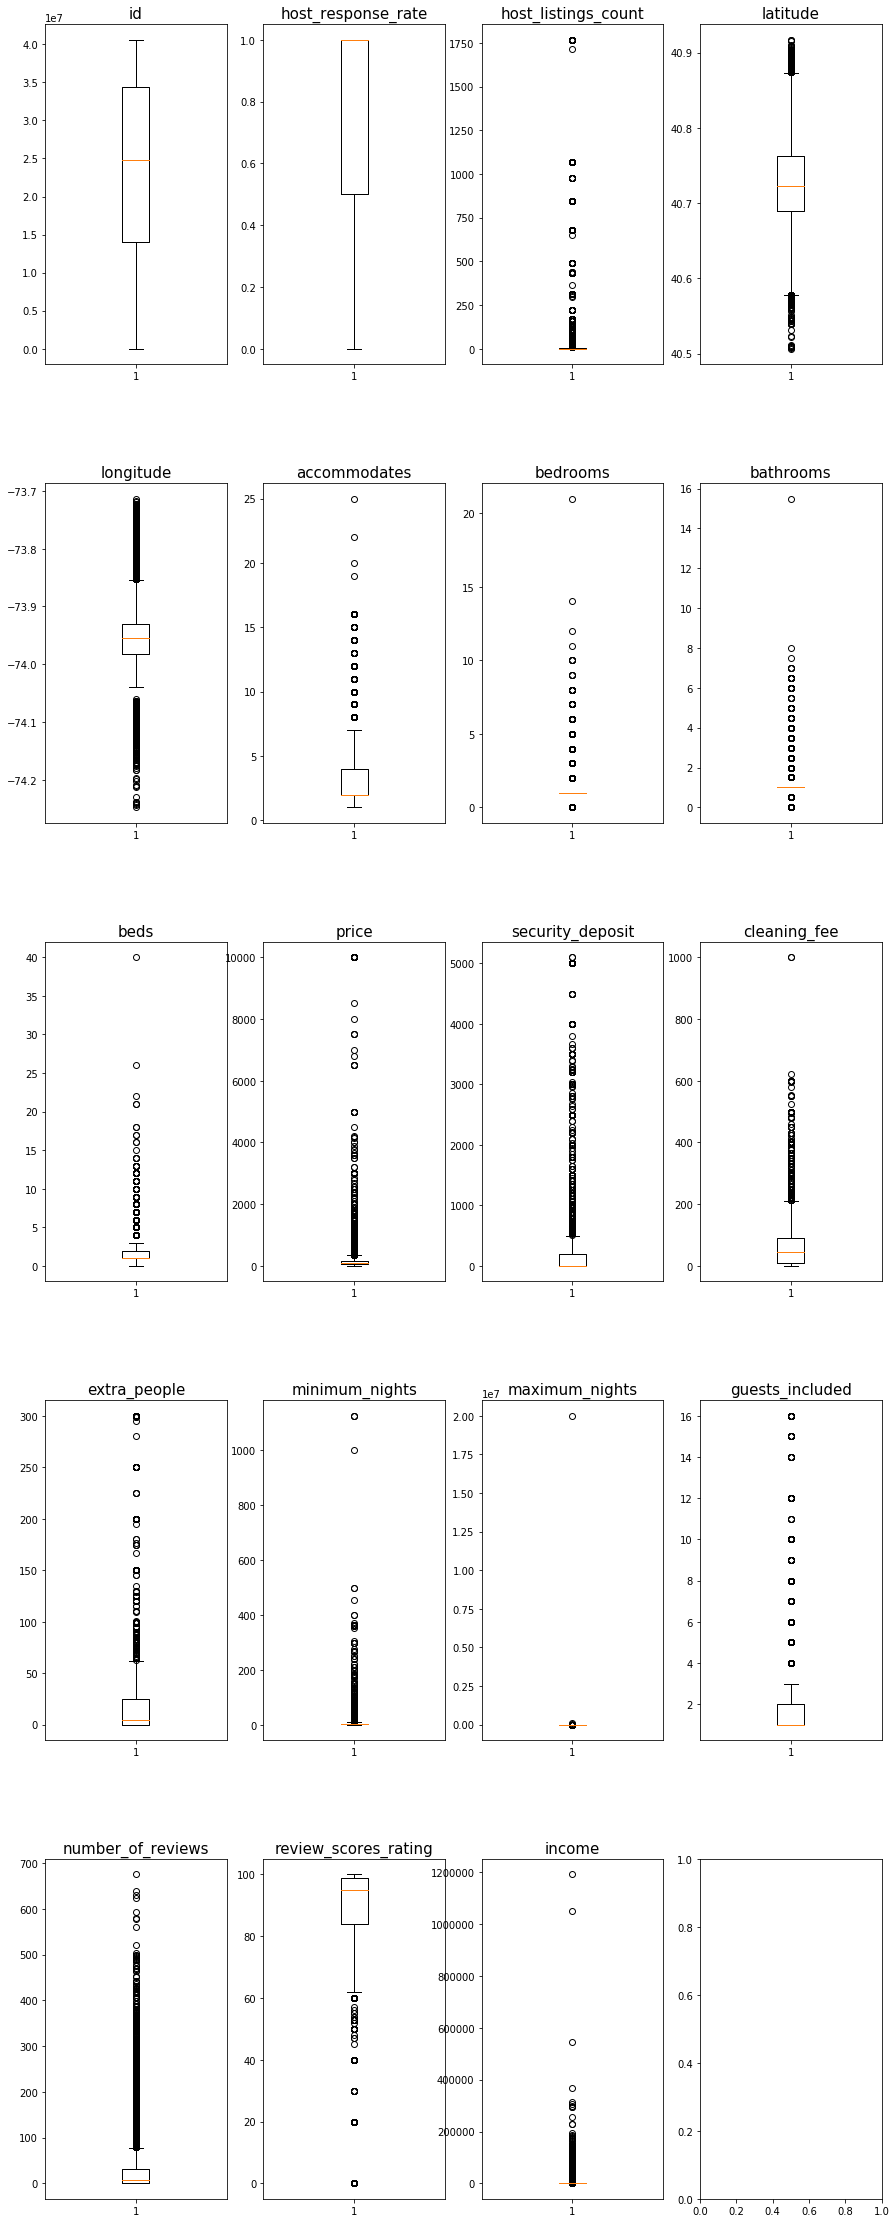

In [13]:
def plot_distribution(variable,key_listings):
    plt.rcParams['figure.figsize'] = (15,40)
    
    xxx,sub=plt.subplots(5,4)
    xxx.subplots_adjust(hspace= 0.35)
    sub=sub.flatten()
    for i in range(len(variable)):
        sub[i].boxplot(x=key_listings[variable[i]])
        sub[i].set_title(f'{variable[i]}',fontsize=15)
        sub[i].tick_params(labelsize=10)

plot_distribution(numerical_variable,key_listings)

# caculate upper limit values
key_listings_numerical.loc['upper_limits',:] = key_listings_numerical.iloc[6, :] + 1.5 * (key_listings_numerical.iloc[6, :]- key_listings_numerical.iloc[4, :])
key_listings_numerical

### 4) Address Outliers

In [14]:
def outliers_remove(key_listings,variable,minvalue,maxvalue):
    key_listings = key_listings[key_listings[variable]>minvalue]
    key_listings = key_listings[key_listings[variable]<= maxvalue]
    key_listings.reset_index(drop=True,inplace=True)
    return key_listings

#### a)	Approach 1: Remove values above upper limits in boxplots
The first approach is to remove extreme values above upper limits in boxplots. 

And remove zero values in <font color=red>'host_listings_count'</font> and <font color=red>'price'</font>.

BUT, this approach seems too **CONSERVATIVE**, which reduced the number of listings to <font color=orange>534</font>. 

In [15]:
#key_listings = outliers_remove(key_listings,"income",0,3226.605)

#key_listings = outliers_remove(key_listings,"accommodates",1,7)
#key_listings = outliers_remove(key_listings,"bathrooms",0,1)
#key_listings = outliers_remove(key_listings,"bedrooms",0,1)
#key_listings = outliers_remove(key_listings,"beds",0,3.5)
#key_listings = outliers_remove(key_listings,"cleaning_fee",0,210)
#key_listings = outliers_remove(key_listings,"extra_people",0,62.5)
#key_listings = outliers_remove(key_listings,"host_listings_count",1,6) 
#key_listings = outliers_remove(key_listings,"guests_included",0,3.5)
#key_listings = outliers_remove(key_listings,"maximum_nights",0,365) 
#key_listings = outliers_remove(key_listings,"minimum_nights",0,9.5)
#key_listings = outliers_remove(key_listings,"number_of_reviews",0,78.5)
#key_listings = outliers_remove(key_listings,"price",0,344)
#key_listings = outliers_remove(key_listings,"security_deposit",0,500)

#key_listings.shape

#### b) Approach 2: Remove obvious extreme values
The second approach was manually setting max values and min values and only cope with obvious extreme values in <font color=red>'income'</font>,<font color=red>‘host_listings_count’</font>, <font color=red>‘maximum_nights’</font>, <font color=red>‘minimum_nights’</font>,and <font color=red>‘price’</font>.

This approach reduced the number of listings to <font color=orange>32,739</font>. 

In [16]:
key_listings = outliers_remove(key_listings,"income",0,200000)
key_listings = outliers_remove(key_listings,"host_listings_count",0,1000) 
key_listings = outliers_remove(key_listings,"maximum_nights",0,1125) 
key_listings = outliers_remove(key_listings,"minimum_nights",0,500)
key_listings = outliers_remove(key_listings,"price",0,5000)

key_listings.shape

(32739, 31)

# III. Sub-Task 1: Summary Statistics

## 1. Descriptive Statistics of Numerical Variables
Here, the function <font color=blue>stat_numeri_var($\;$)</font> was used again that was defined at Section II,6,2). 

In [17]:
key_listings_numerical = stat_numeri_var(key_listings)
key_listings_numerical

,income,accommodates,bathrooms,bedrooms,beds,cleaning_fee,extra_people,guests_included,host_listings_count,host_response_rate,latitude,longitude,maximum_nights,minimum_nights,number_of_reviews,price,review_scores_rating,security_deposit
count,32739.00,32739.00,32739.00,32739.00,32739.00,32739.00,32739.00,32739.00,32739.00,32739.00,32739.00,32739.00,32739.00,32739.00,32739.00,32739.00,32739.00,32739.0
mean,2191.76,2.94,1.15,1.19,1.59,56.47,17.06,1.62,8.12,0.74,40.73,-73.95,560.09,6.28,36.12,139.40,92.33,180.1
std,7347.33,1.94,0.43,0.75,1.19,55.04,25.62,1.25,46.55,0.41,0.06,0.05,530.39,14.74,54.38,148.86,14.76,414.9
min,1.67,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,40.51,-74.25,1.00,1.00,1.00,10.00,0.00,0.0
25%,147.81,2.00,1.00,1.00,1.00,15.00,0.00,1.00,1.00,0.64,40.69,-73.98,29.00,2.00,4.00,67.00,91.00,0.0
50%,556.88,2.00,1.00,1.00,1.00,49.00,10.00,1.00,1.00,1.00,40.72,-73.95,365.00,2.00,14.00,100.00,96.00,0.0
75%,1813.31,4.00,1.00,1.00,2.00,85.00,25.00,2.00,3.00,1.00,40.76,-73.93,1125.00,4.00,44.00,169.00,100.00,200.0
max,194617.50,16.00,15.50,21.00,40.00,1000.00,300.00,16.00,975.00,1.00,40.92,-73.71,1125.00,456.00,675.00,5000.00,100.00,5100.0


## 2. Popular Characteristics of Properties
Listing characteristics: <font color = red>'amenities', 'bed_type', 'neighbourhood_group_cleansed', 'property_type','room_type','instant_bookable'<font>.

### 1) Amenities Types  and Distribution across Properties

In [18]:
amenities_types = []
for i in key_listings['amenities']:
    amenities = i.split(",")
    for amenity in amenities:
        if amenity not in amenities_types:
            amenities_types.append(amenity)
print(f"There are {len(amenities_types)} amenities in properties.")

There are 129 amenities in properties.


In [19]:
all_amenities=key_listings['amenities'].tolist()
all_amenities=','.join(map(str, all_amenities)).split(',')
freq_amenity = FreqDist(all_amenities)
freq_amenity_df = pd.DataFrame({'Amenity': list(freq_amenity.keys()),'Count': list(freq_amenity.values())})
freq_amenity_df['Percentage'] = (freq_amenity_df['Count']/len(key_listings) * 100).round(2)
freq_amenity_df.reindex(freq_amenity_df['Percentage'].sort_values(ascending=False).index).head(15)                                                                                           

,Amenity,Count,Percentage
1,Wifi,32216,98.40
6,Heating,31328,95.69
11,Essentials,31257,95.47
0,TV,30433,92.96
3,Kitchen,29555,90.27
8,Smoke detector,29406,89.82
2,Air conditioning,28677,87.59
41,Hangers,26638,81.36
9,Carbon monoxide detector,24498,74.83
13,Hair dryer,24294,74.21


### 2) Neighborhood Groups and Listing Distribution

In [20]:
print((key_listings.neighbourhood_group_cleansed.value_counts()/len(key_listings) * 100).round(2))

Brooklyn         42.36
Manhattan        40.44
Queens           13.58
Bronx             2.74
Staten Island     0.89
Name: neighbourhood_group_cleansed, dtype: float64


### 3) Statistics of Property Type

In [21]:
print((key_listings.property_type.value_counts()/len(key_listings) * 100).round(2))

Apartment                 75.61
House                      9.79
Townhouse                  4.22
Condominium                3.33
Loft                       3.32
Guest suite                1.07
Serviced apartment         0.63
Boutique hotel             0.53
Hotel                      0.38
Guesthouse                 0.17
Other                      0.16
Hostel                     0.16
Resort                     0.14
Bed and breakfast          0.11
Bungalow                   0.07
Villa                      0.07
Tiny house                 0.05
Camper/RV                  0.05
Cottage                    0.02
Boat                       0.02
Aparthotel                 0.02
Earth house                0.02
Tent                       0.01
Houseboat                  0.01
Casa particular (Cuba)     0.01
Barn                       0.01
Cabin                      0.00
Castle                     0.00
Dome house                 0.00
Bus                        0.00
Cave                       0.00
Yurt    

### 4) Statistics of Room Type

In [22]:
print((key_listings.room_type.value_counts()/len(key_listings) * 100).round(2))

Entire home/apt    51.52
Private room       45.23
Shared room         2.43
Hotel room          0.82
Name: room_type, dtype: float64


### 5) Statistics of Bed Type

In [23]:
print((key_listings.bed_type.value_counts()/len(key_listings) * 100).round(2))

Real Bed         98.59
Futon             0.55
Pull-out Sofa     0.50
Airbed            0.24
Couch             0.12
Name: bed_type, dtype: float64


### 6) Statistics of Instant-bookable Listings

In [24]:
print((key_listings.instant_bookable.value_counts()/len(key_listings) * 100).round(2))

f    59.7
t    40.3
Name: instant_bookable, dtype: float64


## 3. Popular Characteristics of Host
Host information: <font color = red>'host_has_profile_pic','host_identity_verified','host_is_superhost','require_guest_phone_verification', 'require_guest_profile_picture'<font> 

### 1) Most Powerful Host

In [25]:
print(key_listings.host_listings_count.max())
print(key_listings.loc[key_listings.host_listings_count == key_listings.host_listings_count.max()]['host_name'])

975.0
25646    Christian
32130    Christian
Name: host_name, dtype: object


### 2) Most Popular Host

In [26]:
print(key_listings.number_of_reviews.max())
print(key_listings.loc[key_listings.number_of_reviews == key_listings.number_of_reviews.max()]['host_name'])

675
6909    Dona
Name: host_name, dtype: object


### 3) Statistics of Hosts with Profile Photo, with Verified Identity, Super Hosts, Requiring Guests’ Verification and with Requiring Guests’ Profile Photo

In [27]:
print((key_listings.host_has_profile_pic.value_counts()/len(key_listings) * 100).round(2))
print((key_listings.host_identity_verified.value_counts()/len(key_listings) * 100).round(2))
print((key_listings.host_is_superhost.value_counts()/len(key_listings) * 100).round(2))
print((key_listings.require_guest_phone_verification.value_counts()/len(key_listings) * 100).round(2))
print((key_listings.require_guest_profile_picture.value_counts()/len(key_listings) * 100).round(2))

t    99.8
f     0.2
Name: host_has_profile_pic, dtype: float64
f    53.14
t    46.86
Name: host_identity_verified, dtype: float64
f    72.18
t    27.82
Name: host_is_superhost, dtype: float64
f    97.12
t     2.88
Name: require_guest_phone_verification, dtype: float64
f    97.39
t     2.61
Name: require_guest_profile_picture, dtype: float64


# IV.	Sub-Task 2: Host Income and Listing Location

## 1. Listings Distribution in NYC

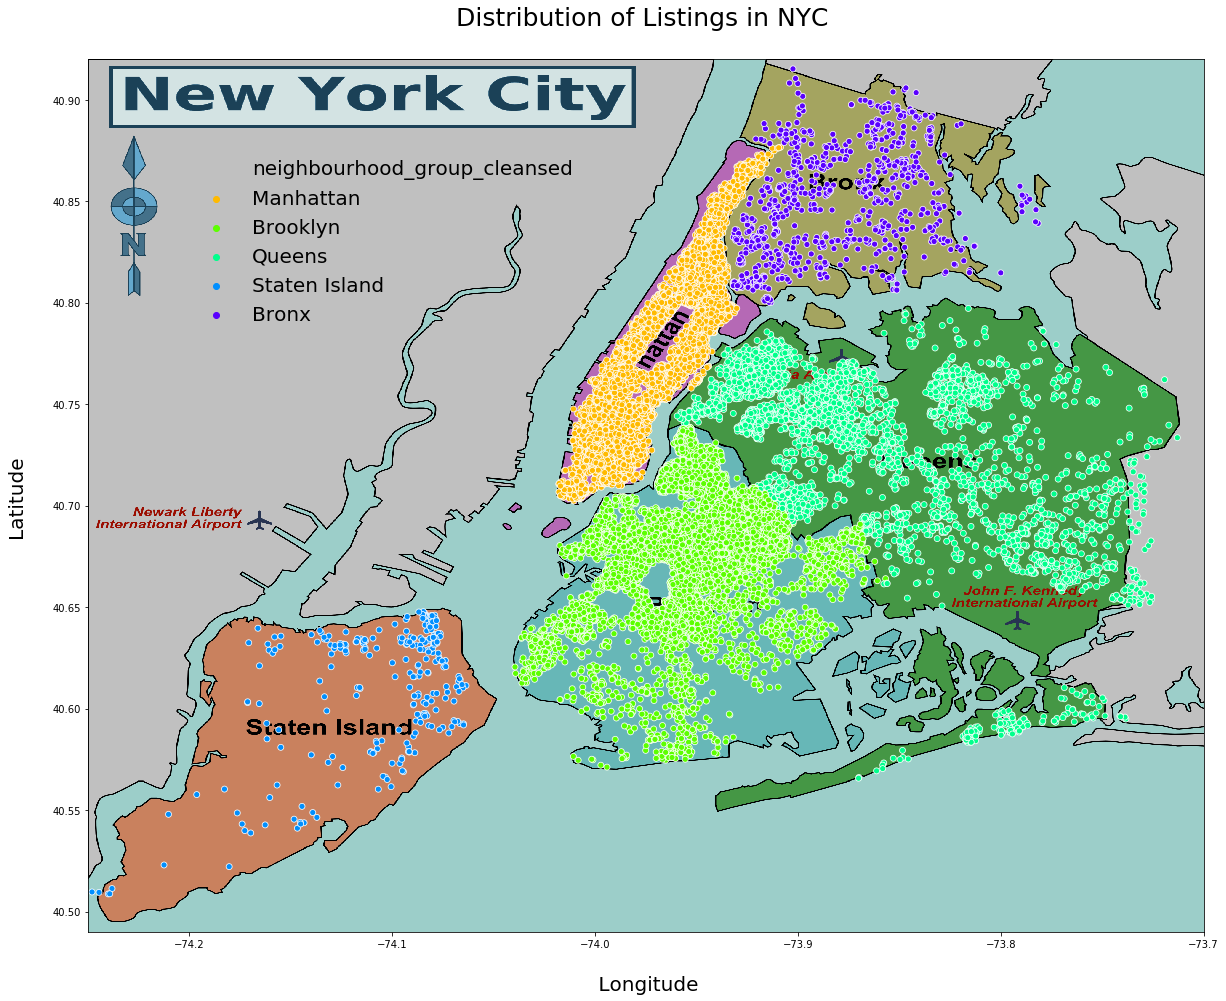

In [28]:
plt.figure(figsize=(20,18))
# Downloaded NYC map from https://upload.wikimedia.org/wikipedia/commons/5/5a/New_York_City_District_Map.png
nyc_pic=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/5/5a/New_York_City_District_Map.png')
nyc_img=plt.imread(nyc_pic)
plt.imshow(nyc_img,zorder=0,extent=[-74.25, -73.7, 40.49,40.92]) # modify values based on the scatterplot
ax=plt.gca()

sns.scatterplot(data=key_listings, x='longitude', y='latitude', hue='neighbourhood_group_cleansed', palette='gist_rainbow',ax=ax)
plt.title('Distribution of Listings in NYC \n', fontsize=25)
plt.ylabel('Latitude\n',fontsize=20)
plt.xlabel("\n Longitude",fontsize=20)
plt.legend(bbox_to_anchor=(0.09, 0.895), loc='upper left', borderaxespad=0.,frameon=False, fontsize= 20)

plt.savefig('Distribution of Listings in NYC.png',transparent=False)

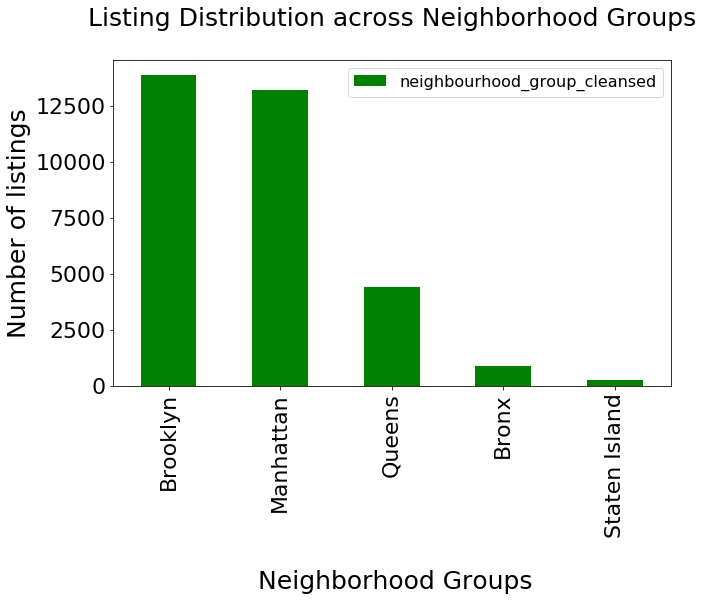

In [29]:

def plot_neighborhood_group(df,title,nthreshhold):

    listings_per_nbhood = df['neighbourhood_group_cleansed'].value_counts()

    acceptable_nbhood = listings_per_nbhood[listings_per_nbhood >=nthreshhold].index
    acceptable_listings = df[df['neighbourhood_group_cleansed'].isin(acceptable_nbhood)]
    listings_per_nbhood = acceptable_listings['neighbourhood_group_cleansed'].value_counts()
    
    listings_per_nbhood.to_frame()
    listings_per_nbhood.columns = ['neighborhood_group','count']
    
    plt.rcParams['figure.figsize']=(10,6)
    listings_per_nbhood.plot(x="neighborhood_group", y='count', kind="bar", color = "green")

    plt.ylabel('Number of listings',fontsize=25)
    plt.xlabel('\n Neighborhood Groups',fontsize=25)
    plt.title(title,fontsize=25)
    plt.tick_params(labelsize=22)
    plt.legend(fontsize=16)
    

df = key_listings
plot_neighborhood_group(df,"Listing Distribution across Neighborhood Groups\n",50)
plt.savefig('Listing Distribution across Neighborhood Groups.png',transparent=False)

## 2. Average Host Income across Neighborhood Groups

### 1) Distribution of Average Host Income across Neighborhood Groups

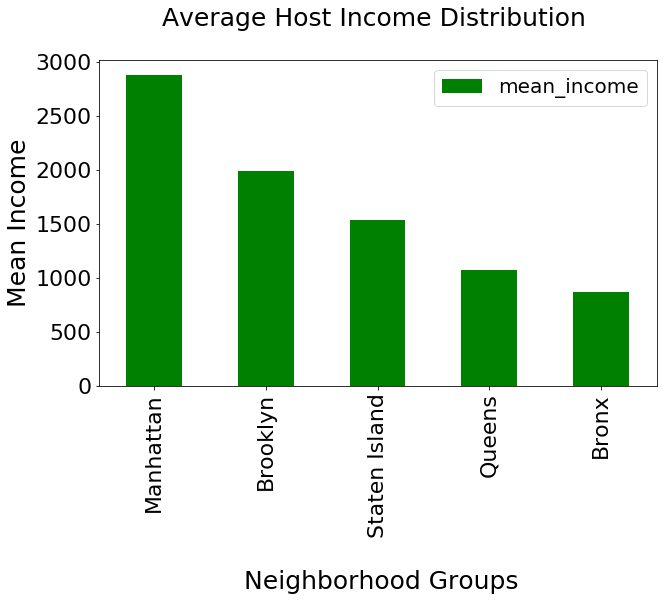

In [30]:
def plot_mean_income(variable,label,df,nlength,title):
    
    sort_income = df.groupby(variable)['income'].mean().sort_values(ascending=False)
    sort_income = sort_income.to_frame().reset_index()
    sort_income.rename(columns ={variable:label,
                           'income':'mean_income'}, inplace=True)
    
    z = sort_income.copy()
    z = z.nlargest(columns="mean_income", n =min(len(z),nlength))
    
    plt.rcParams['figure.figsize']=(10,6)

    z.plot(x=label, y='mean_income', kind="bar",color="green")
    
    plt.ylabel('Mean Income',fontsize=25)
    plt.xlabel('\n Neighborhood Groups',fontsize=25)

    plt.title(title,fontsize=25)
    plt.tick_params(labelsize=22)
    plt.legend(fontsize=20)

df = key_listings
nshow=25
plot_mean_income('neighbourhood_group_cleansed','neighborhood_group',df,nshow,"Average Host Income Distribution \n")
plt.savefig('Average Income Distribution across Neighborhood Groups.png',transparent=False)

### 2)  T-Test: Average Host Income and Neighborhood Groups
  * The difference between average host income in Manhattan and Brooklyn was significant.
  * The difference between average host income in Manhattan and Bronx was significant.
  * The difference between average host income in Manhattan and Queens was significant.
  * The difference between average host income in Bronx and Brooklyn was significant.
  * The difference between average host income in Queens and Brooklyn was significant.
  * The difference between average host income in Staten Island and Bronx was significant.

In [31]:
inc_neighbor = key_listings.loc[:,['income','neighbourhood_group_cleansed']]

Manhattan = inc_neighbor.loc[inc_neighbor.neighbourhood_group_cleansed.isin(['Manhattan'])]
Brooklyn = inc_neighbor.loc[inc_neighbor.neighbourhood_group_cleansed.isin(['Brooklyn'])]
StatenIsland = inc_neighbor.loc[inc_neighbor.neighbourhood_group_cleansed.isin(['Staten Island'])]
Bronx = inc_neighbor.loc[inc_neighbor.neighbourhood_group_cleansed.isin(['Bronx'])]
Queens = inc_neighbor.loc[inc_neighbor.neighbourhood_group_cleansed.isin(['Queens'])]

mean_income_Manhattan = round(Manhattan.income.mean(), 2)
mean_income_Brooklyn = round(Brooklyn.income.mean(), 2)
mean_income_StatenIsland = round(StatenIsland.income.mean(), 2)
mean_income_Bronx = round(Bronx.income.mean(), 2)
mean_income_Queens = round(Queens.income.mean(), 2)

t1, p1 = stats.ttest_ind(Manhattan.income,Brooklyn.income)
t2, p2 = stats.ttest_ind(Manhattan.income,StatenIsland.income)
t3, p3 = stats.ttest_ind(Manhattan.income,Bronx.income)
t4, p4 = stats.ttest_ind(Manhattan.income,Queens.income)
t5, p5 = stats.ttest_ind(StatenIsland.income,Brooklyn.income)
t6, p6 = stats.ttest_ind(Bronx.income,Brooklyn.income)
t7, p7 = stats.ttest_ind(Queens.income,Brooklyn.income)
t8, p8 = stats.ttest_ind(Bronx.income,StatenIsland.income)
t9, p9 = stats.ttest_ind(Queens.income,StatenIsland.income)
t10, p10 = stats.ttest_ind(Bronx.income,Queens.income)

print(f"The mean host income in Manhattan is ${mean_income_Manhattan}, while the mean host income in Brooklyn is ${mean_income_Brooklyn}. \nSignificant difference? t={t1:.3f}, p={p1:.3f}\n")
print(f"The mean host income in Manhattan is ${mean_income_Manhattan}, while the mean host income in StatenIsland is ${mean_income_StatenIsland}. \nSignificant difference? t={t2:.3f}, p={p2:.3f}\n")
print(f"The mean host income in Manhattan is ${mean_income_Manhattan}, while the mean host income in Bronx is ${mean_income_Bronx}. \nSignificant difference? t={t3:.3f}, p={p3:.3f}\n")
print(f"The mean host income in Manhattan is ${mean_income_Manhattan}, while the mean host income in Queens is ${mean_income_Queens}. \nSignificant difference? t={t4:.3f}, p={p4:.3f}\n")
print(f"The mean host income in Brooklyn is ${mean_income_Brooklyn}),while the mean host income in StatenIsland is ${mean_income_StatenIsland}. \nSignificant difference? t={t5:.3f}, p={p5:.3f}\n")
print(f"The mean host income in Brooklyn is ${mean_income_Brooklyn}),while the mean host income in Bronx is ${mean_income_Bronx}. \nSignificant difference? t={t6:.3f}, p={p6:.3f}\n")
print(f"The mean host income in Brooklyn is ${mean_income_Brooklyn}),while the mean host income in Queens is ${mean_income_Queens}. \nSignificant difference? t={t7:.3f}, p={p7:.3f}\n")
print(f"The mean host income in StatenIsland is ${mean_income_StatenIsland}),while the mean host income in Bronx is ${mean_income_Bronx}. \nSignificant difference? t={t8:.3f}, p={p8:.3f}\n")
print(f"The mean host income in StatenIsland is ${mean_income_StatenIsland}),while the mean host income in Queens is ${mean_income_Queens}. \nSignificant difference? t={t9:.3f}, p={p9:.3f}\n")
print(f"The mean host income in Bronx is ${mean_income_Bronx}),while the mean host income in Queens is ${mean_income_Queens}. \nSignificant difference? t={t10:.3f}, p={p10:.3f}\n")

The mean host income in Manhattan is $2877.75, while the mean host income in Brooklyn is $1994.7. 
Significant difference? t=9.176, p=0.000

The mean host income in Manhattan is $2877.75, while the mean host income in StatenIsland is $1539.56. 
Significant difference? t=2.462, p=0.014

The mean host income in Manhattan is $2877.75, while the mean host income in Bronx is $867.47. 
Significant difference? t=6.506, p=0.000

The mean host income in Manhattan is $2877.75, while the mean host income in Queens is $1073.25. 
Significant difference? t=12.756, p=0.000

The mean host income in Brooklyn is $1994.7),while the mean host income in StatenIsland is $1539.56. 
Significant difference? t=-1.206, p=0.228

The mean host income in Brooklyn is $1994.7),while the mean host income in Bronx is $867.47. 
Significant difference? t=-5.255, p=0.000

The mean host income in Brooklyn is $1994.7),while the mean host income in Queens is $1073.25. 
Significant difference? t=-9.217, p=0.000

The mean host

## 3. Host Income across Neighborhood Groups

### 1)  Density and Distribution of Host Income across Neighborhood Groups

Percentage of income exceeding $500 is 52.2893%.


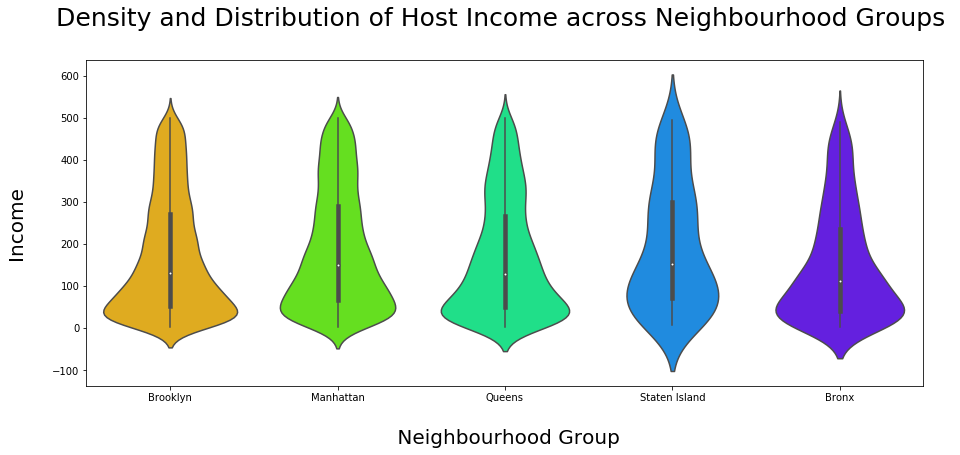

In [32]:
plt.figure(figsize=(15,6))

# 52% of income exceeding $500, thus income in plot was restricted to $500.
print(f'Percentage of income exceeding $500 is {key_listings[key_listings.income>500].count()[0]/key_listings.shape[0] * 100 :.4f}%.')

sns.violinplot(data=key_listings[key_listings.income <500], x='neighbourhood_group_cleansed', y='income', palette='gist_rainbow')
plt.title('Density and Distribution of Host Income across Neighbourhood Groups \n', fontsize=25)
plt.xlabel('\n Neighbourhood Group',fontsize=20)
plt.ylabel("Income\n" ,fontsize=20)
plt.savefig('Density and Distribution of Host Income across Neighbourhood Groups.png',transparent=False)

### 2) Distribution of Host Income in NYC

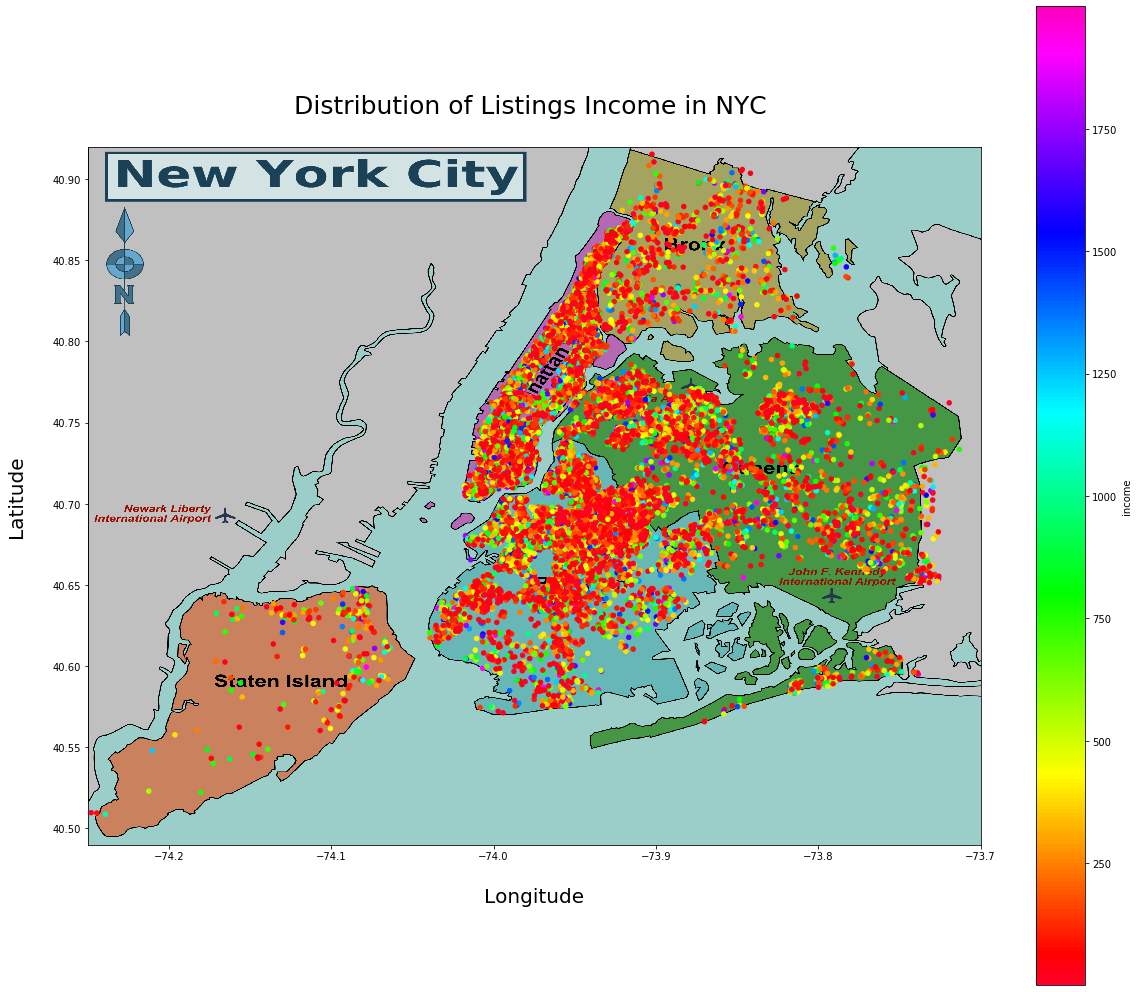

In [33]:
plt.figure(figsize=(20,18))

nyc_pic=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/5/5a/New_York_City_District_Map.png')
nyc_img=plt.imread(nyc_pic)
plt.imshow(nyc_img,zorder=0,extent=[-74.25, -73.7, 40.49,40.92]) # modify values based on the scatterplot
ax=plt.gca()

key_listings[key_listings.income<2000].plot(kind='scatter', x='longitude', y='latitude', c='income', ax=ax, 
           cmap=plt.get_cmap('gist_rainbow'), colorbar=True, alpha=10,  zorder=5)

plt.title('Distribution of Listings Income in NYC \n', fontsize=25)
plt.ylabel('Latitude\n',fontsize=20)
plt.xlabel("\nLongitude",fontsize=20)

plt.savefig('Distribution of Listings Income in NYC.png',transparent=False)

### 3)   Correlation between Host Income and Listing Location
The correlation between host income and listing locations was too subtle which would not be taken into consideration in regression analysis. 

In [34]:
inc_neighbor_encode = inc_neighbor.copy()
inc_neighbor_encode = pd.get_dummies(inc_neighbor_encode)
inc_neighbor_encode = inc_neighbor_encode.rename(columns={'neighbourhood_group_cleansed_Staten Island': 'neighbourhood_group_cleansed_StatenIsland'})

corr_neigh= inc_neighbor_encode.corr()
print (corr_neigh['income'].sort_values(ascending=False))

income                                       1.000000
neighbourhood_group_cleansed_Manhattan       0.076931
neighbourhood_group_cleansed_StatenIsland   -0.008392
neighbourhood_group_cleansed_Brooklyn       -0.022993
neighbourhood_group_cleansed_Bronx          -0.030252
neighbourhood_group_cleansed_Queens         -0.060341
Name: income, dtype: float64


# V. Sub-Task 3: Host Income and Room Types

## 1. Host Income Distribution Respecting to Room Type

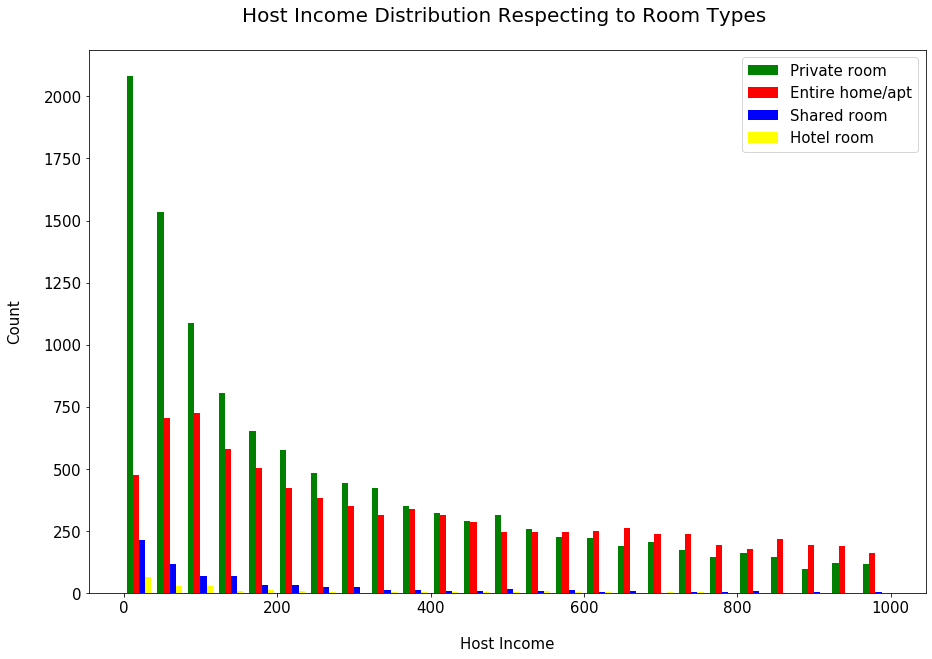

In [35]:
def plot_income_room_type(df,title):
    df2 = df.pivot(columns='room_type',values='income')
    x2=list(df2[df2.columns[0]])
    x4=list(df2[df2.columns[1]])
    x1=list(df2[df2.columns[2]])
    x3=list(df2[df2.columns[3]])

    plt.rc('legend',**{'fontsize':15})
    plt.rcParams['figure.figsize']=(15,10)
    plt.tick_params(labelsize=15)
    plt.ylabel("Count\n",fontsize=15)
    plt.xlabel("\nHost Income",fontsize=15)
    plt.title(title,fontsize=20)
    plt.tick_params(labelsize=15)
    n_bins=25
    colors = ['green','red',"blue",'yellow']
    labels=[df2.columns[2],df2.columns[0],df2.columns[3],df2.columns[1]]

    plt.hist([x1, x2, x3, x4], n_bins, histtype='bar', 
             color=colors, range=[0,1000],label=labels,alpha=1)
         
    plt.legend(loc="upper right")

df = key_listings
title = "Host Income Distribution Respecting to Room Types \n"
plot_income_room_type(df,title)

plt.savefig('Host Income Distribution Respecting to Room Types.png',transparent=False)

## 2.	Correlation between Host Income and Room Types

In [36]:
inc_room = key_listings.loc[:,['income','room_type']]

inc_room_encode = pd.get_dummies(inc_room)
inc_room_encode = inc_room_encode.rename(columns={'room_type_Entire home/apt':'Entire_home_or_apt'})
inc_room_encode = inc_room_encode.rename(columns={'room_type_Hotel room':'Hotel_room'})
inc_room_encode = inc_room_encode.rename(columns={'room_type_Private room':'Private_room'})
inc_room_encode = inc_room_encode.rename(columns={'room_type_Shared room':'Shared_room'})

corr_room= inc_room_encode.corr()
print (corr_room['income'].sort_values(ascending=False))

income                1.000000
Entire_home_or_apt    0.163525
Hotel_room           -0.014900
Shared_room          -0.039184
Private_room         -0.149371
Name: income, dtype: float64


# VI. Sub-Task 4: Host Income and Amenities

## 1.  Average Income Distribution across Amenities

                        amenity  Average Income\n
108            Private bathroom       8774.513636
97                Firm mattress       7205.730570
46     Pack ’n Play/travel crib       6976.996964
77                         Crib       6194.453700
43                   High chair       5986.948274
40             24-hour check-in       5883.466949
95                    Baby bath       5759.109810
71        Children’s dinnerware       5743.239698
44                  Stair gates       5605.896480
45    Children’s books and toys       5447.101252
122         Ground floor access       5104.539583
83   Babysitter recommendations       4937.386199
114            Hot water kettle       4570.199726
80                Window guards       4419.865639
37                     Internet       4396.251790


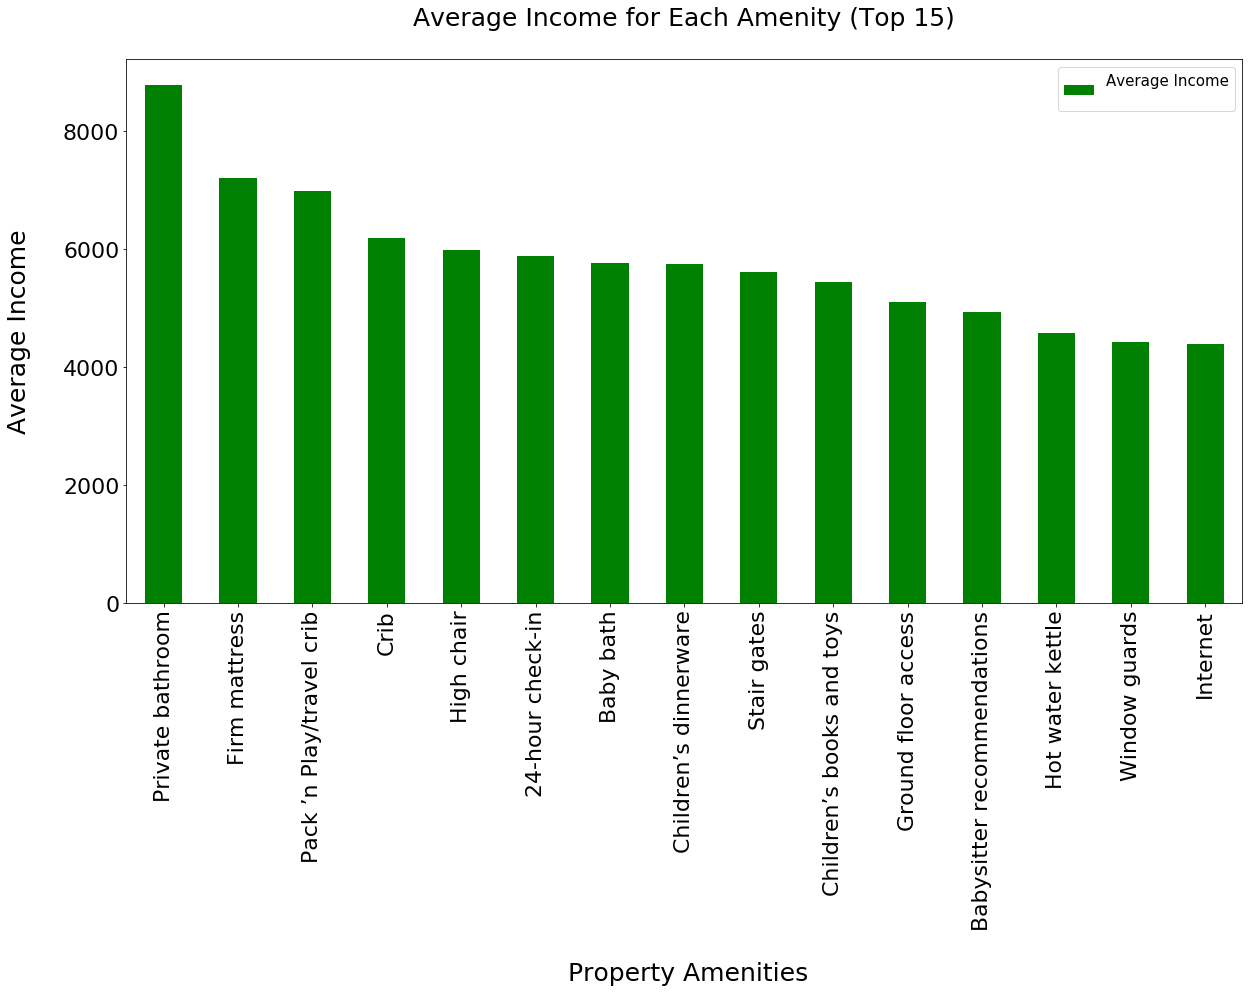

In [37]:
def plot_mean_income_amenity(df,unique_amenities,title,ylabel):
    amenity_income = [(amn, df[df['amenities'].map(lambda amns: amn in amns)]['income'].mean()) 
            for amn in unique_amenities
        ]
  
    amenity_vs_income = pd.Series(data=[a[1] for a in amenity_income], 
                                 index=[a[0] for a in amenity_income])
    amenity_vs_income = amenity_vs_income.to_frame().reset_index()
    
    amenity_vs_income = amenity_vs_income.rename(
        columns= {0: ylabel,'index': 'amenity'})

    d2 = amenity_vs_income.nlargest(columns=ylabel, n = 15)
    print(d2.head(15))


    plt.rcParams['figure.figsize']=(20,10)

    
    d2.plot(x='amenity',y=ylabel,kind='bar',color='green')
    plt.ylabel(ylabel,fontsize=25)
    plt.xlabel(xlabel,fontsize=25)
    plt.title(title,fontsize=25)

    plt.tick_params(labelsize=22)


df =key_listings
unique_amenities = amenities_types

title='Average Income for Each Amenity (Top 15)\n'
xlabel="\n Property Amenities"
ylabel='Average Income\n'
plot_mean_income_amenity(df,unique_amenities,title,ylabel)

plt.savefig('Average Income for Each Amenity (Top 15).png',transparent=False)

## 2. T-Test: Average Host Income and Critical Amenities

### 1) Average Host Income and Child-Friendly Amenities

In [38]:
amenity_income = [(amn, key_listings[key_listings['amenities'].map(lambda amns: amn in amns)]['income'].mean()) 
            for amn in unique_amenities
        ]

amenity_income = pd.DataFrame(amenity_income)
amenity_income.columns = ['amenities','mean_income']


child = amenity_income.loc[amenity_income.amenities.isin(['Pack ’n Play/travel crib','Crib','High chair','Baby bath','Children’s dinnerware','Stair gates','Children’s books and toys','Babysitter recommendations','Window guards'])]
non_child = amenity_income.loc[amenity_income.mean_income < 4396.251790]

mean_income_child = round(child.mean_income.mean(),2)
mean_income_non_child = round(non_child.mean_income.mean(),2)

t_child, p_child = stats.ttest_ind(child.mean_income,non_child.mean_income)
print(f"The mean host income of child-friendly listings is ${mean_income_child}, while the mean host income of non-child-friendly listings is ${mean_income_non_child}. \nSignificant difference? t={t_child:.3f}, p={p_child:.3f}\n")

The mean host income of child-friendly listings is $5674.56, while the mean host income of non-child-friendly listings is $2579.43. 
Significant difference? t=11.234, p=0.000



### 2)  Average Host Income and Private Bathroom

In [39]:
private_bathroom = amenity_income.loc[amenity_income.amenities.isin(['Private bathroom'])]
non_private_bathroom = amenity_income.loc[amenity_income.mean_income < 8774.513636]

mean_income_private_bathroom = round(private_bathroom.mean_income.mean(),2)
mean_income_non_private_bathroom = round(non_private_bathroom.mean_income.mean(),2)

t_private_bathroom, p_private_bathroom = stats.ttest_ind(private_bathroom.mean_income,non_private_bathroom.mean_income)
print(f"The mean host income of listings with private bathroom is ${mean_income_private_bathroom}, while the mean host income of listings without private bathroom is ${mean_income_non_private_bathroom}. \nSignificant difference? t={t_child:.3f}, p={p_child:.3f}\n")

The mean host income of listings with private bathroom is $8774.51, while the mean host income of listings without private bathroom is $2908.49. 
Significant difference? t=11.234, p=0.000



/Users/penguin/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/penguin/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# VI. Sub-Task 5: Regression Analysis 

## 1. Prepare Dataset for Regression Analysis

### 1)	Logarithmically Transform Variable Income 
Based on the histogram, logarithmically-transformed income normally distributes and was used in regression analysis.

In [40]:
percent_income_exceeding_10000 = key_listings[key_listings['income']<=1].count()[0]
print(f"Number of Minimum Income Per Month for Each Listing Exceeding $10000 is {percent_income_exceeding_10000}.")

Number of Minimum Income Per Month for Each Listing Exceeding $10000 is 0.


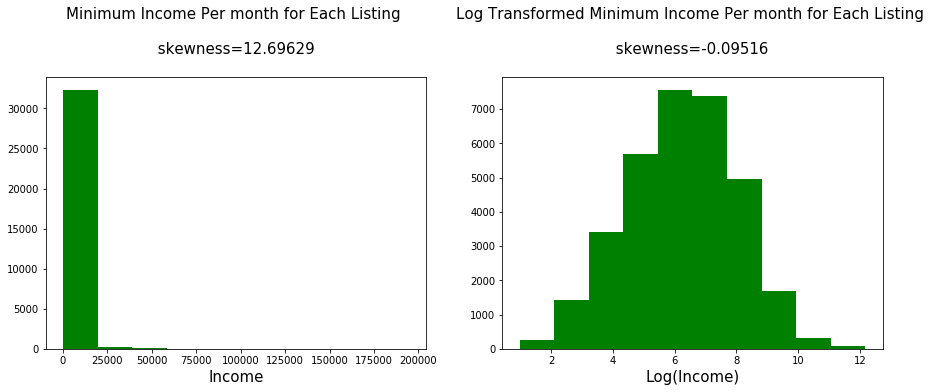

In [41]:
def plot_income(key_listings):
    fig = plt.figure()
    fig.set_size_inches(15,5)
    
    ax1 = fig.add_subplot(1,2,1)
    ax1.hist(key_listings.income, color='green')
    ax1.set_title('Minimum Income Per month for Each Listing \n \n skewness=%.5f \n'%(key_listings.income.skew()),fontsize=15)
    ax1.set_xlabel('Income',fontsize=15)
    ax1.tick_params(labelsize=10)
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.hist(np.log1p(key_listings.income), color='green')
    ax2.set_title('Log Transformed Minimum Income Per month for Each Listing \n \n skewness=%.5f \n'%(np.log1p(key_listings.income).skew()),fontsize=15)
    ax2.set_xlabel('Log(Income)',fontsize=15)
    ax2.tick_params(labelsize=10)

plot_income(key_listings)
key_listings["log_income"] = np.log1p(key_listings.income)

plt.savefig('Distribution of Income and Log Transformed Income.png',transparent=False)

### 2)  Assign Values to Variable "amenities"

There are numerous amenities in listing. It seems unnecessary and impossible to employ the built-in encoding function of *pandas* to separate all different amenities combinations. Instead, amenities of each listing were encoded based on their frequency. 

Assign each amenity a weight based on it's frequency across all the listings considered:

$$w(i) = \frac{f(i)}{f_{max}},$$
where $f(i)$ is the frequency of amenity $i$ and $f_{max}={\rm max}\{f(i):\, i\in {\rm amenities}\}$ is the maximum frequency ($f_{max}$ depends to the WiFi amenity). In essence, the more frequent an specific amenity, the greater its weight. Obviously, the maximum value of $w(i)$ is 1 and the minimum value is 0. 


Accordingly, for a listing containing $N$ amenities, the set of amenities were replaced by the sum $s$ of the weights of the amenities: $$s=\sum_{i=1}^{N}w(i).$$


<font color=dark red> The process below usually took around 10 minites !!!!!!</font>

In [42]:
data = key_listings.copy()

def apply_weights_to_listings(x,w):
    x = list(x.split(','))
    s=sum([w['Count'][w['Amenity'][w['Amenity']==i].index.tolist()[0]] for i in x])
    return s

def engineer_amenities(df,amenities_freq_dist):
    w = amenities_freq_dist.copy()
    w['Count'] =w['Count']/w['Count'].max()
    df['amenities']=df['amenities'].apply(apply_weights_to_listings,args=[w])
    return df

data = engineer_amenities(data,freq_amenity_df)

In [43]:
data_backup = data.copy()
data_backup.head(1)

,id,host_name,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,bed_type,accommodates,bedrooms,bathrooms,beds,amenities,price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,guests_included,number_of_reviews,review_scores_rating,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,income,log_income
0,2595,Jennifer,0.85,f,6.0,t,t,Manhattan,40.75362,-73.98377,Apartment,Entire home/apt,Real Bed,1,0.0,1.0,1.0,17.023001,225.0,350.0,95.0,0.0,10,1125,1,48,94.0,f,t,t,12686.0,9.448333


### 3)	Encode Categorical Variables
* Encode <font color=dark red>property_type</font>: Apartment = 1, Non-Apartment = 0.
* Encode <font color=dark red>host_is_superhost</font>: True = 1, False = 0.
* Encode <font color=dark red>host_has_profile_pic</font>: True = 1, False = 0.
* Encode <font color=dark red>host_identity_verified</font>: True = 1, False = 0.
* Encode <font color=dark red>instant_bookable</font>: True = 1, False = 0.
* Encode <font color=dark red>require_guest_profile_picture</font>: True = 1, False = 0.
* Encode <font color=dark red>require_guest_phone_verification</font>: True = 1, False = 0.

In [44]:
A = data_backup.drop(['host_name','bed_type','latitude','longitude','neighbourhood_group_cleansed'],axis = 1)

A['type_listing'] = np.where(A['property_type'].str.contains("Apartment"), 1, 0)
A["superhost"] = np.where(A['host_is_superhost'].str.contains("t"), 1, 0)
A["host_pic"] = np.where(A['host_has_profile_pic'].str.contains("t"), 1, 0)
A["host_identity"] = np.where(A['host_identity_verified'].str.contains("t"), 1, 0)
A["instant_book"] = np.where(A['instant_bookable'].str.contains("t"), 1, 0)
A["guest_pic"] = np.where(A['require_guest_profile_picture'].str.contains("t"), 1, 0)
A["guest_photo"] = np.where(A['require_guest_phone_verification'].str.contains("t"), 1, 0)

dataset = A.drop(['require_guest_phone_verification','require_guest_profile_picture','instant_bookable','host_identity_verified','host_has_profile_pic','property_type','host_is_superhost',],axis = 1)

In [45]:
dataset = pd.get_dummies(dataset) 
print(dataset.shape)

(32739, 30)


## 2.	Model Creation and Interpretation

In [46]:
corrmat = dataset.corr()

print (corrmat['log_income'].sort_values(ascending=False).head(10))
print (corrmat['log_income'].sort_values(ascending=False).tail(10))

log_income                   1.000000
number_of_reviews            0.525604
income                       0.475881
cleaning_fee                 0.409884
amenities                    0.382631
room_type_Entire home/apt    0.375006
host_response_rate           0.295627
superhost                    0.286245
accommodates                 0.277020
minimum_nights               0.270970
Name: log_income, dtype: float64
bathrooms                 0.063614
host_listings_count       0.016234
host_pic                  0.005226
type_listing             -0.006565
maximum_nights           -0.030874
room_type_Hotel room     -0.062331
instant_book             -0.085327
room_type_Shared room    -0.135351
room_type_Private room   -0.323362
id                       -0.484832
Name: log_income, dtype: float64


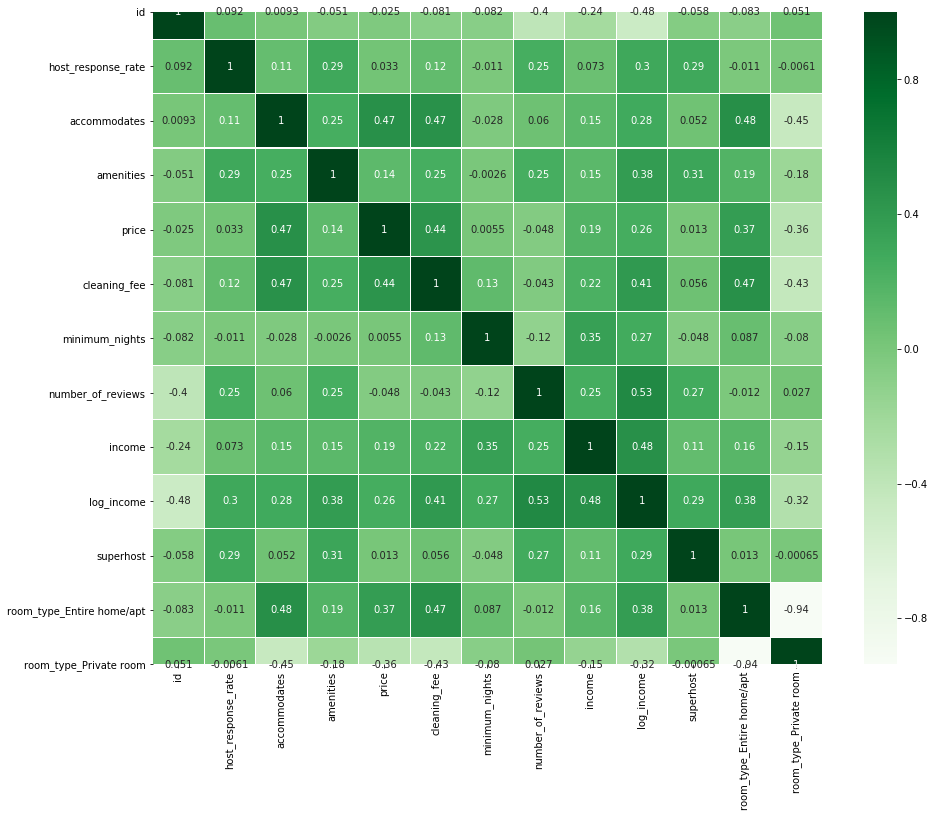

In [47]:
top_corr_variables = corrmat.index[abs(corrmat["log_income"])>0.25]

plt.figure(figsize=(15,12))
sns.heatmap(dataset[top_corr_variables].corr(), annot=True, linewidths=0.1, cmap='Greens')
plt.savefig('Correlation Heatmap.png',transparent=False)

In [48]:
dataset = dataset.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_or_apt'})
dataset = dataset.rename(columns={'room_type_Private room': 'room_type_Private_room'})

In [49]:
m1 = smf.ols(formula = 'log_income ~  room_type_Private_room +room_type_Entire_home_or_apt + minimum_nights + accommodates + superhost+ host_response_rate + number_of_reviews + cleaning_fee + amenities + price', data=dataset).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_income   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     5505.
Date:                Thu, 26 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:06:27   Log-Likelihood:                -49015.
No. Observations:               32739   AIC:                         9.805e+04
Df Residuals:                   32728   BIC:                         9.814e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.0037      0.040     74.619      0.000       2.925       3.083
room_type_Private_room           0.5657      0.034     16.407      0.000       0.498       0.633
room_type_Entire_home_or_apt     1.2772      0.035     35.982      0.000       1.208       1.347
minimum_nights                   0.0347      0.000     83.616      0.000       0.034       0.035
accommodates                    -0.0380      0.004     -9.654      0.000      -0.046      -0.030
superhost                        0.3361      0.015     22.916      0.000       0.307       0.365
host_response_rate               0.4279      0.016     26.502      0.000       0.396       0.460
number_of_reviews                0.0165      0.000    137.837      0.000       0.016       0.017
cleaning_fee                     0.0073      0.000     53.099      0.000       0.007       0.008
amenities                        0.0466      0.002     26.543      0.000       0.043       0.050
price                            0.0012   4.79e-05     25.162      0.000       0.001       0.001
==============================================================================
Omnibus:                     4354.201   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13811.962
Skew:                          -0.690   Prob(JB):                         0.00
Kurtosis:                       5.867   Cond. No.                     2.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
m1_r2 = m1.rsquared
print(f"R Square from Model 1: {m1_r2:.4f}")

m1_pred = m1.predict(dataset)
m1_rmse = np.sqrt(mean_squared_error(np.expm1(dataset.log_income), np.expm1(m1_pred)))
print(f"RMSE from Model 1: {m1_rmse:.0f}")

R Square from Model 1: 0.6271
RMSE from Model 1: 24990448


In [51]:
m2 = smf.ols(formula = 'log_income ~  room_type_Private_room +room_type_Entire_home_or_apt + minimum_nights + accommodates +superhost*host_response_rate + superhost+ host_response_rate + number_of_reviews + cleaning_fee + amenities + price', data=dataset).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_income   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     5029.
Date:                Thu, 26 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:06:27   Log-Likelihood:                -48964.
No. Observations:               32739   AIC:                         9.795e+04
Df Residuals:                   32727   BIC:                         9.805e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        2.9665      0.040     73.499      0.000       2.887       3.046
room_type_Private_room           0.5724      0.034     16.626      0.000       0.505       0.640
room_type_Entire_home_or_apt     1.2878      0.035     36.321      0.000       1.218       1.357
minimum_nights                   0.0346      0.000     83.544      0.000       0.034       0.035
accommodates                    -0.0383      0.004     -9.743      0.000      -0.046      -0.031
superhost                        0.8380      0.052     16.124      0.000       0.736       0.940
host_response_rate               0.4763      0.017     28.312      0.000       0.443       0.509
superhost:host_response_rate    -0.5512      0.055    -10.064      0.000      -0.659      -0.444
number_of_reviews                0.0165      0.000    138.151      0.000       0.016       0.017
cleaning_fee                     0.0073      0.000     52.932      0.000       0.007       0.008
amenities                        0.0465      0.002     26.505      0.000       0.043       0.050
price                            0.0012   4.78e-05     25.328      0.000       0.001       0.001
==============================================================================
Omnibus:                     4366.921   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13931.283
Skew:                          -0.690   Prob(JB):                         0.00
Kurtosis:                       5.882   Cond. No.                     2.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
m2_r2 = m2.rsquared
print(f"R Square from Model 2: {m2_r2:.4f}")

m2_pred = m2.predict(dataset)
m2_rmse = np.sqrt(mean_squared_error(np.expm1(dataset.log_income), np.expm1(m2_pred)))
print(f"RMSE from Model 2: {m2_rmse:.0f}")

R Square from Model 2: 0.6283
RMSE from Model 2: 24489787


## 3. Out-of-sample Testing

### 1) Create Training Dataset and Testing Dataset by 80%/20%

In [54]:
R = RandomState(seed=1)
X_train = dataset.sample(frac=0.8, random_state=R)
X_test = dataset.loc[~dataset.index.isin(X_train.index)]
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

Y_train = X_train['log_income']
Y_test = X_test['log_income']

In [55]:
print(X_train.shape,Y_train.shape )
print(X_test.shape,Y_test.shape )

(26191, 30) (26191,)
(6548, 30) (6548,)


### 2) Evaluate Model in Testing Dataset

In [56]:
def train_and_evaluate_model(formula, name):
    
    model = smf.ols(formula = formula, data=X_train).fit()
    
    r2 = model.rsquared
    
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(X_test.log_income, predictions))
    test_r2 = np.corrcoef(X_test.log_income, predictions)[0][1]**2
    print(f"RMSE from {name}  on test: {rmse:.3f}")
    print(f"r^2 from {name} on test: {test_r2:.3f}")
    results = {
        "RMSE":rmse, 
        "R_Squared":r2, 
        "Predicted Values":predictions, 
        "Actual Values":X_test.log_income
    }
    return results
    
m1_results = train_and_evaluate_model('log_income ~ room_type_Private_room + minimum_nights + accommodates + superhost+ host_response_rate + number_of_reviews + cleaning_fee + amenities + room_type_Entire_home_or_apt + price', "Model 1")
m2_results = train_and_evaluate_model('log_income ~ room_type_Private_room + minimum_nights + accommodates + superhost+ host_response_rate + superhost*host_response_rate + number_of_reviews + cleaning_fee + amenities + room_type_Entire_home_or_apt + price', "Model 2") 

RMSE from Model 1  on test: 1.090
r^2 from Model 1 on test: 0.620
RMSE from Model 2  on test: 1.089
r^2 from Model 2 on test: 0.621


In [57]:
train_rmse = [m1_rmse, m2_rmse]
train_r2 = [m1_r2, m2_r2]

test_rmse = [m1_results["RMSE"], m2_results["RMSE"]]
test_r2 = [m1_results["R_Squared"], m2_results["R_Squared"]]

print(train_rmse, train_r2 , test_rmse, test_r2)

[24990448.002288837, 24489787.239428103] [0.6271410613314559, 0.6282915399999127] [1.0904243409081977, 1.08912637410266] [0.6288656539178155, 0.6300789514896417]


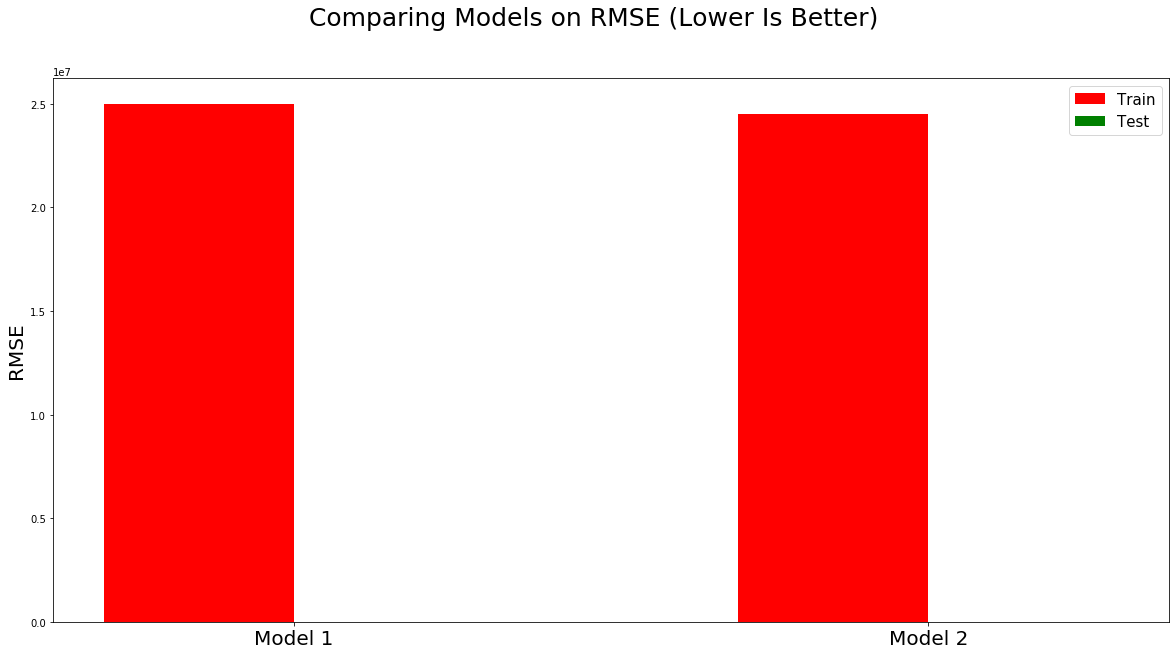

In [58]:
w = 0.3
locs = np.arange(2)
plt.bar(locs-(w/2), train_rmse, width=w, color="red")
plt.bar(locs+(w/2), test_rmse, width=w, color="green")
plt.xticks(locs, ["Model 1", "Model 2"],fontsize = 20)
plt.legend(["Train", "Test"])
plt.ylabel("RMSE",fontsize = 20)

plt.suptitle("Comparing Models on RMSE (Lower Is Better)",fontsize=25)

plt.savefig('RMSE in Model 1 and Model 2.png',transparent=False)

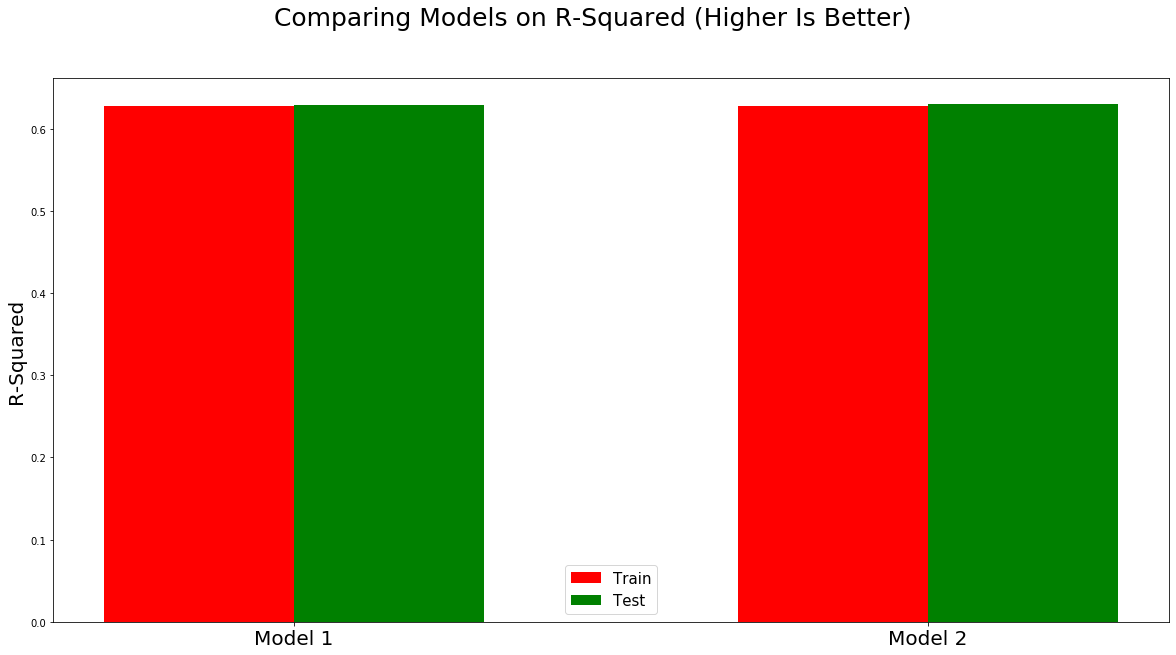

In [59]:
plt.bar(locs-(w/2), train_r2, width=w, color="red")
plt.bar(locs+(w/2), test_r2, width=w,color="green")
plt.xticks(locs, ["Model 1", "Model 2"],fontsize=20)
plt.legend(["Train", "Test"])
plt.ylabel("R-Squared",fontsize = 20)
plt.suptitle("Comparing Models on R-Squared (Higher Is Better)",fontsize = 25)

plt.savefig('R-Squared in Model 1 and Model 2.png',transparent=False)